# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [3]:
apple = pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\2. Pandas Basic Exercises\Exercise Data Files\Pandas Exercise Apple Stock files\appl_1980_2014.csv')


### Step 3. Assign it to a variable apple

In [4]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date']=pd.to_datetime(apple.Date)

In [7]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [8]:
apple = apple.set_index('Date')

In [9]:
apple.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 7.  Is there any duplicate dates?

In [10]:
bb=apple.index.duplicated()

In [11]:
bb

array([False, False, False, ..., False, False, False])

In [12]:
np.where(bb == True)

(array([], dtype=int64),)

In [13]:
aa= pd.Series(bb)

In [14]:
aa.apply(lambda x: x == True)

0       False
1       False
2       False
3       False
4       False
        ...  
8460    False
8461    False
8462    False
8463    False
8464    False
Length: 8465, dtype: bool

### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [15]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [16]:
apple.sort_index(axis=0)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

### UDF for Last business Day of each month

In [ ]:
def last_business_day(date_1):
  date = pd.Timestamp(date_1)
  new_date=date+pd.DateOffset(months=1,day=1,days=-1)
  if (new_date.day == 31 and new_date.day_name()!=('Sunday' or 'Saturday')):
    Last_Business_Day=new_date.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif (new_date.day == 30 and new_date.day_name()!=('Sunday' or 'Saturday')):
    Last_Business_Day=new_date.day_name()
    return('Last Business Day is',Last_Business_Day)  
  elif(new_date.day == 31 and new_date.day_name()==('Sunday')):
    Last_Business_Day_1=new_date+pd.DateOffset(days=-2)
    Last_Business_Day=Last_Business_Day_1.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 31 and new_date.day_name()==('Saturday')):
    Last_Business_Day_2=new_date+pd.DateOffset(days=-1)
    Last_Business_Day=Last_Business_Day_2.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 30 and new_date.day_name()==('Sunday')):
    Last_Business_Day_3=new_date+pd.DateOffset(days=-2)
    Last_Business_Day=Last_Business_Day_3.day_name() 
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 30 and new_date.day_name()==('Saturday')):
    Last_Business_Day_4=new_date+pd.DateOffset(days=-1)
    Last_Business_Day=Last_Business_Day_4.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 28 and new_date.day_name()!=('Sunday' or 'Saturday')):
    Last_Business_Day=new_date.day_name()
    return('Last Business Day is',Last_Business_Day)  
  elif(new_date.day == 28 and new_date.day_name()==('Sunday')):
    Last_Business_Day_5=new_date+pd.DateOffset(days=-2)
    Last_Business_Day=Last_Business_Day_5.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 28 and new_date.day_name()==('Saturday')):
    Last_Business_Day_6=new_date+pd.DateOffset(days=-1)
    Last_Business_Day=Last_Business_Day_6.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 29 and new_date.day_name()!=('Sunday' or 'Saturday')):
    Last_Business_Day=new_date.day_name()
    return('Last Business Day is',Last_Business_Day)  
  elif(new_date.day == 29 and new_date.day_name()==('Sunday')):
    Last_Business_Day_7=new_date+pd.DateOffset(days=-2)
    Last_Business_Day=Last_Business_Day_7.day_name()
    return('Last Business Day is',Last_Business_Day)
  elif(new_date.day == 29 and new_date.day_name()==('Saturday')):
    Last_Business_Day_8=new_date+pd.DateOffset(days=-1)
    Last_Business_Day=Last_Business_Day_8.day_name()
    return('Last Business Day is',Last_Business_Day)

### Step 10.  What is the difference in days between the first day and the oldest

In [18]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [19]:
a1=apple.index.max()

In [20]:
a2=apple.index.min()

In [21]:
m3=0
d2=0
def months_between(a1,a2):
    if a1>a2:
        a11=a1+pd.DateOffset(years=-1)
        a22=a2+pd.DateOffset(years=1)
        m1=(a11.year-a22.year)*12+12
    if a1.month>1:
            m2=a1.month-1
            d1=a1.day
    elif a1.month==1:
            d1=a1.day 
    if a2.month<12:
        global m3
        m3=12-(a2.month)
        global d2
        d2=a2.day       
    elif a2.month==12:
            d2=a2.day        
    return ('Total_Month',m1+m2+m3,'Extra_Days',d1+d2)

In [22]:
months_between(a1,a2)

('Total_Month', 402, 'Extra_Days', 20)

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [23]:
apple.rename(columns={'Adj Close':'AdjClose'},inplace=True)

In [24]:
apple

,Open,High,Low,Close,Volume,AdjClose
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


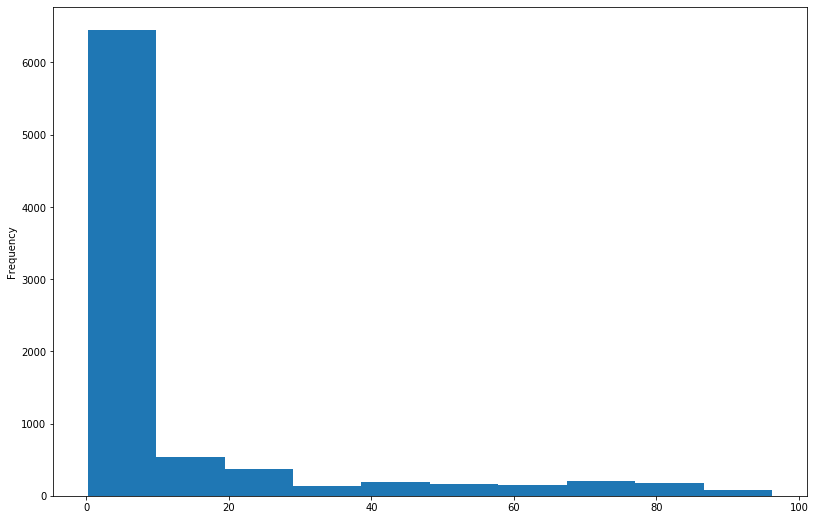

In [25]:
apple.AdjClose.plot(kind='hist',figsize=(13.5,9))